In [3]:
import numpy as np
import plotly.graph_objects as go

from binary.checking.one_sample.simulation import simulation_sprt
from binary.checking.tools import freq_conf_interval

# Правосторонняя альтернатива

In [4]:
alternative = "greater"
alpha = 0.05
beta = 0.2

iter_size = 50_000
batch_size = 10_000
p0_list = [0.01, 0.05, 0.1, 0.2, 0.5]
lift_list = [0.05, 0.1, 0.2, 0.5]

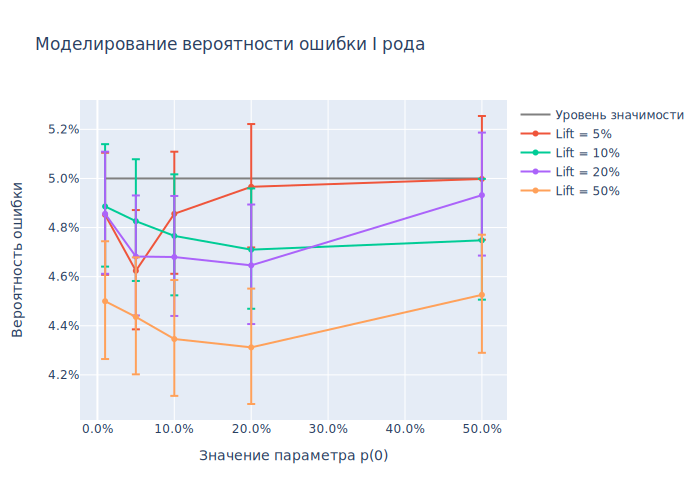

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=p0_list,
                         y=alpha * np.ones(len(p0_list)),
                         mode="lines",
                         line={"color": "gray"},
                         name=f"Уровень значимости"))

for lift in lift_list:
    error_rate_list = []
    
    for p0 in p0_list:
        d = p0 * lift
        
        res = simulation_sprt(p0, iter_size, batch_size, 
                              p0, d, alpha, beta, alternative)
        result_list = res["result"]
        
        error_rate = np.mean(np.where(result_list > 0, 1, 0))
        error_rate_list.append(error_rate)
    
    left_side_list, right_side_list = freq_conf_interval(error_rate_list, iter_size)
    
    fig.add_trace(go.Scatter(x=p0_list,
                             y=error_rate_list,
                             mode="markers+lines",
                             name=f"Lift = {lift:.0%}",
                             error_y={
                                 "type": "data",
                                 "symmetric": False,
                                 "arrayminus": left_side_list,
                                 "array": right_side_list
                             }))

fig.update_layout(title="Моделирование вероятности ошибки I рода",
                  xaxis_title="Значение параметра p(0)",
                  yaxis_title="Вероятность ошибки",
                  xaxis_tickformat=".1%",
                  yaxis_tickformat=".1%")
fig.show(renderer="svg")

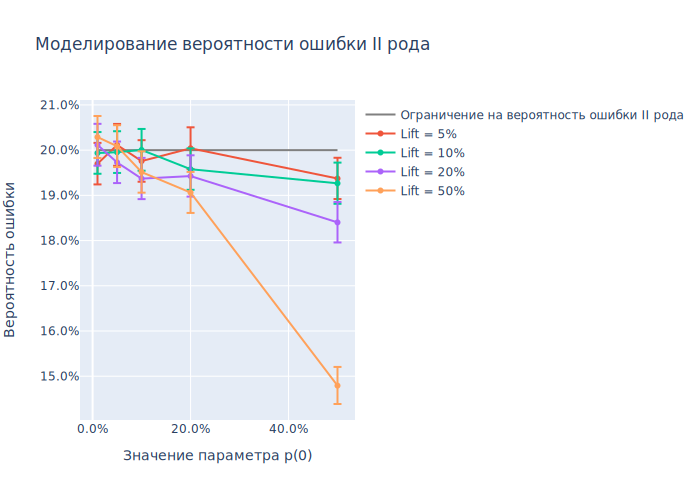

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=p0_list,
                         y=beta * np.ones(len(p0_list)),
                         mode="lines",
                         line={"color": "gray"},
                         name="Ограничение на вероятность ошибки II рода"))

for lift in lift_list:
    error_rate_list = []
    
    for p0 in p0_list:
        d = p0 * lift
        
        res = simulation_sprt(p0+d, iter_size, batch_size, 
                              p0, d, alpha, beta, alternative)
        result_list = res["result"]
        
        error_rate = np.mean(np.where(result_list < 0, 1, 0))
        error_rate_list.append(error_rate)
    
    left_side_list, right_side_list = freq_conf_interval(error_rate_list, iter_size)
    
    fig.add_trace(go.Scatter(x=p0_list,
                             y=error_rate_list,
                             mode="markers+lines",
                             name=f"Lift = {lift:.0%}",
                             error_y={
                                 "type": "data",
                                 "symmetric": False,
                                 "arrayminus": left_side_list,
                                 "array": right_side_list
                             }))

fig.update_layout(title="Моделирование вероятности ошибки II рода",
                  xaxis_title="Значение параметра p(0)",
                  yaxis_title="Вероятность ошибки",
                  xaxis_tickformat=".1%",
                  yaxis_tickformat=".1%")
fig.show(renderer="svg")

# Левосторонняя альтернатива

In [7]:
alternative = "less"
alpha = 0.05
beta = 0.2

iter_size = 50_000
batch_size = 10_000
p0_list = [0.01, 0.05, 0.1, 0.2, 0.5]
lift_list = [0.05, 0.1, 0.2, 0.5]

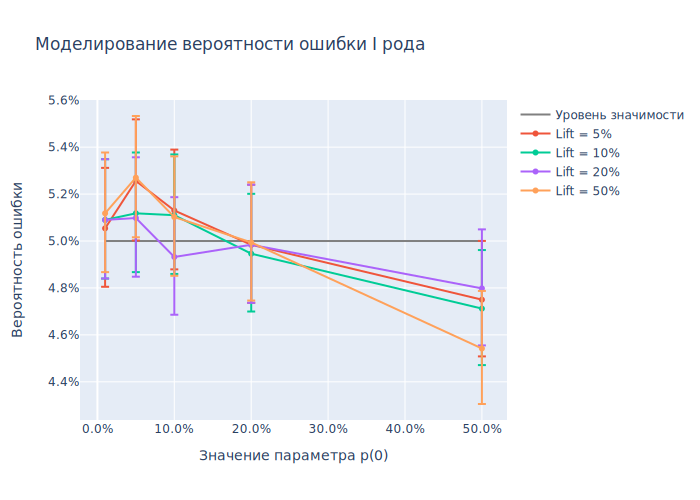

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=p0_list,
                         y=alpha * np.ones(len(p0_list)),
                         mode="lines",
                         line={"color": "gray"},
                         name=f"Уровень значимости"))

for lift in lift_list:
    error_rate_list = []
    
    for p0 in p0_list:
        d = p0 * lift
        
        res = simulation_sprt(p0, iter_size, batch_size, 
                              p0, d, alpha, beta, alternative)
        result_list = res["result"]
        
        error_rate = np.mean(np.where(result_list < 0, 1, 0))
        error_rate_list.append(error_rate)
    
    left_side_list, right_side_list = freq_conf_interval(error_rate_list, iter_size)
    
    fig.add_trace(go.Scatter(x=p0_list,
                             y=error_rate_list,
                             mode="markers+lines",
                             name=f"Lift = {lift:.0%}",
                             error_y={
                                 "type": "data",
                                 "symmetric": False,
                                 "arrayminus": left_side_list,
                                 "array": right_side_list
                             }))

fig.update_layout(title="Моделирование вероятности ошибки I рода",
                  xaxis_title="Значение параметра p(0)",
                  yaxis_title="Вероятность ошибки",
                  xaxis_tickformat=".1%",
                  yaxis_tickformat=".1%")
fig.show(renderer="svg")

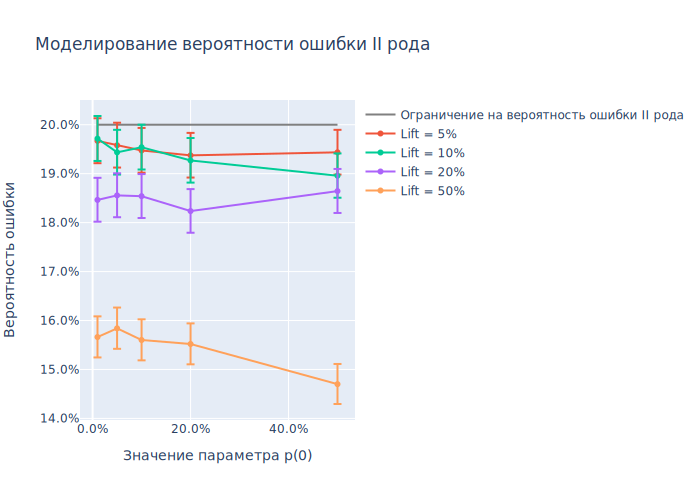

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=p0_list,
                         y=beta * np.ones(len(p0_list)),
                         mode="lines",
                         line={"color": "gray"},
                         name="Ограничение на вероятность ошибки II рода"))

for lift in lift_list:
    error_rate_list = []
    
    for p0 in p0_list:
        d = p0 * lift
        
        res = simulation_sprt(p0-d, iter_size, batch_size, 
                              p0, d, alpha, beta, alternative)
        result_list = res["result"]
        
        error_rate = np.mean(np.where(result_list > 0, 1, 0))
        error_rate_list.append(error_rate)
    
    left_side_list, right_side_list = freq_conf_interval(error_rate_list, iter_size)
    
    fig.add_trace(go.Scatter(x=p0_list,
                             y=error_rate_list,
                             mode="markers+lines",
                             name=f"Lift = {lift:.0%}",
                             error_y={
                                 "type": "data",
                                 "symmetric": False,
                                 "arrayminus": left_side_list,
                                 "array": right_side_list
                             }))

fig.update_layout(title="Моделирование вероятности ошибки II рода",
                  xaxis_title="Значение параметра p(0)",
                  yaxis_title="Вероятность ошибки",
                  xaxis_tickformat=".1%",
                  yaxis_tickformat=".1%")
fig.show(renderer="svg")

# Двусторонняя альтернатива

In [10]:
alternative = "two-sided"
alpha = 0.05
beta = 0.2

iter_size = 50_000
batch_size = 10_000
p0_list = [0.01, 0.05, 0.1, 0.2, 0.5]
lift_list = [0.05, 0.1, 0.2, 0.5]

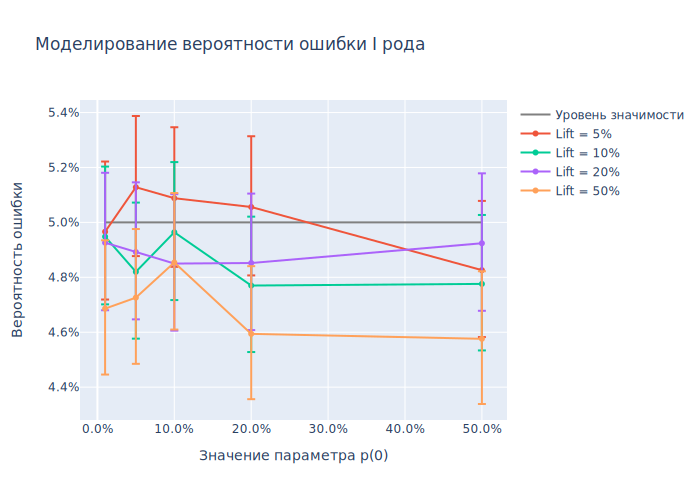

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=p0_list,
                         y=alpha * np.ones(len(p0_list)),
                         mode="lines",
                         line={"color": "gray"},
                         name=f"Уровень значимости"))

for lift in lift_list:
    error_rate_list = []
    
    for p0 in p0_list:
        d = p0 * lift
        
        res = simulation_sprt(p0, iter_size, batch_size, 
                              p0, d, alpha, beta, alternative)
        result_list = res["result"]
        
        error_rate = np.mean(np.where(result_list > 0, 1, 0))
        error_rate_list.append(error_rate)
    
    left_side_list, right_side_list = freq_conf_interval(error_rate_list, iter_size)
    
    fig.add_trace(go.Scatter(x=p0_list,
                             y=error_rate_list,
                             mode="markers+lines",
                             name=f"Lift = {lift:.0%}",
                             error_y={
                                 "type": "data",
                                 "symmetric": False,
                                 "arrayminus": left_side_list,
                                 "array": right_side_list
                             }))

fig.update_layout(title="Моделирование вероятности ошибки I рода",
                  xaxis_title="Значение параметра p(0)",
                  yaxis_title="Вероятность ошибки",
                  xaxis_tickformat=".1%",
                  yaxis_tickformat=".1%")
fig.show(renderer="svg")

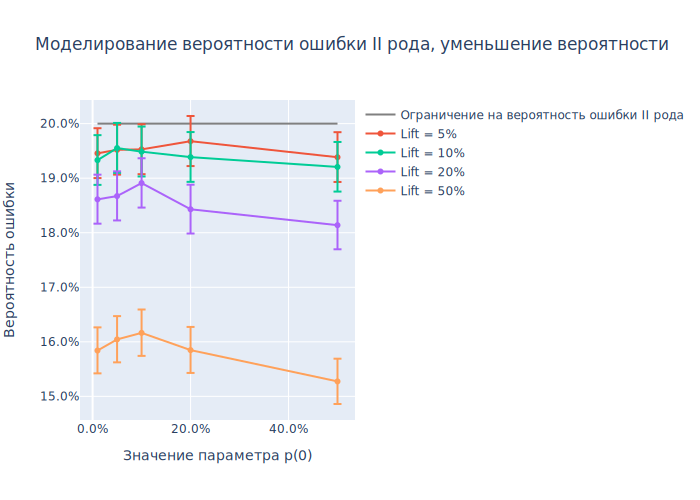

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=p0_list,
                         y=beta * np.ones(len(p0_list)),
                         mode="lines",
                         line={"color": "gray"},
                         name="Ограничение на вероятность ошибки II рода"))

for lift in lift_list:
    error_rate_list = []
    
    for p0 in p0_list:
        d = p0 * lift
        
        res = simulation_sprt(p0-d, iter_size, batch_size, 
                              p0, d, alpha, beta, alternative)
        result_list = res["result"]
        
        duration_list = res["duration"]
        total_s = res["result_s"]
        freq_list = total_s / duration_list
        
        error_rate = np.mean(np.where((result_list < 0) | (freq_list > p0), 1, 0))
        error_rate_list.append(error_rate)
    
    left_side_list, right_side_list = freq_conf_interval(error_rate_list, iter_size)
    
    fig.add_trace(go.Scatter(x=p0_list,
                             y=error_rate_list,
                             mode="markers+lines",
                             name=f"Lift = {lift:.0%}",
                             error_y={
                                 "type": "data",
                                 "symmetric": False,
                                 "arrayminus": left_side_list,
                                 "array": right_side_list
                             }))

fig.update_layout(title="Моделирование вероятности ошибки II рода, уменьшение вероятности",
                  xaxis_title="Значение параметра p(0)",
                  yaxis_title="Вероятность ошибки",
                  xaxis_tickformat=".1%",
                  yaxis_tickformat=".1%")
fig.show(renderer="svg")

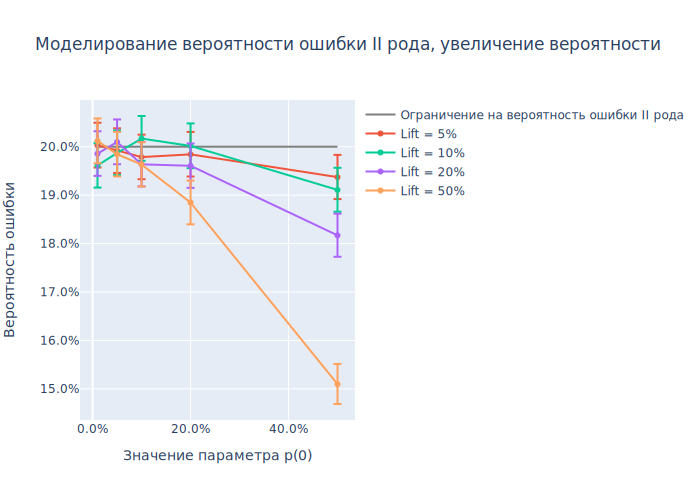

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=p0_list,
                         y=beta * np.ones(len(p0_list)),
                         mode="lines",
                         line={"color": "gray"},
                         name="Ограничение на вероятность ошибки II рода"))

for lift in lift_list:
    error_rate_list = []
    
    for p0 in p0_list:
        d = p0 * lift
        
        res = simulation_sprt(p0+d, iter_size, batch_size, 
                              p0, d, alpha, beta, alternative)
        result_list = res["result"]
        
        duration_list = res["duration"]
        total_s = res["result_s"]
        freq_list = total_s / duration_list
        
        error_rate = np.mean(np.where((result_list < 0) | (freq_list < p0), 1, 0))
        error_rate_list.append(error_rate)
    
    left_side_list, right_side_list = freq_conf_interval(error_rate_list, iter_size)
    
    fig.add_trace(go.Scatter(x=p0_list,
                             y=error_rate_list,
                             mode="markers+lines",
                             name=f"Lift = {lift:.0%}",
                             error_y={
                                 "type": "data",
                                 "symmetric": False,
                                 "arrayminus": left_side_list,
                                 "array": right_side_list
                             }))

fig.update_layout(title="Моделирование вероятности ошибки II рода, увеличение вероятности",
                  xaxis_title="Значение параметра p(0)",
                  yaxis_title="Вероятность ошибки",
                  xaxis_tickformat=".1%",
                  yaxis_tickformat=".1%")
fig.show(renderer="svg")